# Purpose
The purpose of this file is to clean and manage data the 2008-2010 Medicare Claims Synthetic Public Use Files (SynPUFs).

# Setup
First, we'll import the packages we'll need for data management tasks.

In [102]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data and codebook

Next, we will load the Beneficiary Summary files into Python. Each file is separated by year (2008, 2009, 2010).

In [3]:
# load the Beneficiary Summary files
demo_08 = pd.read_csv("data/2008_Beneficiary_Summary_File_Sample_1.csv")
demo_09 = pd.read_csv("data/2009_Beneficiary_Summary_File_Sample_1.csv")
demo_10 = pd.read_csv("data/2010_Beneficiary_Summary_File_Sample_1.csv")

Then we will load in the Beneficiary Summary File **codebook**, which will be used to efficiently rename variable (column) names into names that are more easily readable.

In [4]:
# load the codebook file
codebook_demo = pd.read_excel("codebooks/Codebook_Beneficiary_Summary_File.xlsx",
                              sheet_name = "Codebook")

In [5]:
# create a function to use values from the codebook to rename columns
# we will use the 'old_name' column (original column names) to rename the columns in the dataframes
def rename_columns(df, codebook):
    # Create a mapping from old names to new names
    name_mapping = dict(zip(codebook['old_name'], 
                            codebook['new_name']))
    # Rename the columns in the dataframe
    df.rename(columns=name_mapping, 
              inplace=True)
    return df


# run the function on each data frame
demo_08 = rename_columns(df = demo_08, 
                         codebook = codebook_demo)
demo_09 = rename_columns(df = demo_09, 
                         codebook = codebook_demo)
demo_10 = rename_columns(df = demo_10, 
                         codebook = codebook_demo)

Now we'll examine summary information about the datasets, including the number of rows/columns, the data types of each variable, and the first few rows of each dataset.

In [6]:
# Create a data dictionary with the Beneficiary Summary File names
datasets = {
    "2008 Beneficiary Summary File": demo_08,
    "2009 Beneficiary Summary File": demo_09,
    "2010 Beneficiary Summary File": demo_10
}

# Loop through each Beneficary Summary file to summarize the number of rows/columns.
for name, data in datasets.items():
    rows, cols = data.shape
    print(f"Dataset name: {name}")
    print(f"Number of rows: {rows}")
    print(f"Number of columns: {cols}")
    print("Variable (column) names:", data.columns.tolist())
    print("") # add an extra space between output to improve clarity

Dataset name: 2008 Beneficiary Summary File
Number of rows: 116352
Number of columns: 32
Variable (column) names: ['person_id', 'birthdate', 'deathdate', 'sex', 'race', 'end_stage_renal_disease', 'state_code', 'county_code', 'months_part_a_coverage', 'months_part_b_coverage', 'months_hmo_coverage', 'months_part_d_coverage', 'dementia', 'heart_failure', 'kidney_disease', 'cancer', 'copd', 'depression', 'diabetes', 'ischemic_heart_disease', 'osteoporosis', 'arthritis', 'stroke', 'annual_inpatient_reimbursement', 'annual_inpatient_responsibility', 'annual_inpatient_primary_payer_reimbursement', 'annual_outpatient_reimbursement', 'annual_outpatient_responsibility', 'annual_outpatient_primary_payer_reimbursement', 'annual_carrier_reimbursement', 'annual_carrier_responsibility', 'annual_carrier_primary_payer_responsibility']

Dataset name: 2009 Beneficiary Summary File
Number of rows: 114538
Number of columns: 32
Variable (column) names: ['person_id', 'birthdate', 'deathdate', 'sex', 'race',

Now we want to combine the three Beneficiary Summary files into a single file.

In [24]:
# first, create an indicator for the year
for name, data in datasets.items():
    # extract the year value as the first 4 digits
    # save it as an integer
    data["year"] = int(name[0:4])

# check to make sure the values were assigned correctly in each data frame
print(demo_08['year'].value_counts())
print(demo_09['year'].value_counts())
print(demo_10['year'].value_counts())

year
2008    116352
Name: count, dtype: int64
year
2009    114538
Name: count, dtype: int64
year
2010    112754
Name: count, dtype: int64


Finally, we'll merge the three data frames into one so we can work with all of the data at once.

In [25]:
# merge the dataframes by concatenating them
merged_demo = pd.concat([demo_08, demo_09, demo_10], 
                        ignore_index=True)

# examine the merged data
print("-- Merged DataFrame --")
print(f"Number of rows: {merged_demo.shape[0]}")
print(f"Number of columns: {merged_demo.shape[1]}")
print("Data types for each column:")
print(merged_demo.dtypes)

-- Merged DataFrame --
Number of rows: 343644
Number of columns: 33
Data types for each column:
person_id                                         object
birthdate                                          int64
deathdate                                        float64
sex                                                int64
race                                               int64
end_stage_renal_disease                           object
state_code                                         int64
county_code                                        int64
months_part_a_coverage                             int64
months_part_b_coverage                             int64
months_hmo_coverage                                int64
months_part_d_coverage                             int64
dementia                                           int64
heart_failure                                      int64
kidney_disease                                     int64
cancer                                           

# Variable recoding

First, we'll merge the US state name and abbreviation by the US state FIPS code that was already included in the Beneficiary Summary Files.

In [26]:
# load the US State FIPS code file
fips = pd.read_excel("codebooks/Codebook_Beneficiary_Summary_File.xlsx",
                     sheet_name = "State FIPS Codes")

# merge the `fips` data frame with the merged data
merged_demo = pd.merge(merged_demo, 
                       fips, 
                       how='left', 
                       left_on='state_code', 
                       right_on='state_code')


In [27]:
# summarize the US states in the merged data in a table
state_summary = merged_demo['state_name'].value_counts().reset_index()  
state_summary.columns = ['State Name', 
                         'Count'] 
# sort the summary by count in descending order
state_summary = state_summary.sort_values(by='State Name', 
                                          ascending=True)
# display the state summary
print("-- State Summary --")
print(state_summary)

-- State Summary --
              State Name  Count
13               Alabama   7603
46                Alaska    719
21               Arizona   5458
0               Arkansas  30217
17            California   5945
41              Colorado   1454
45           Connecticut    912
1               Delaware  22888
9   District of Columbia   8902
39               Florida   1604
37               Georgia   1985
14                Hawaii   7380
28                 Idaho   3866
30              Illinois   3368
19               Indiana   5510
24                  Iowa   5047
35                Kansas   2041
22              Kentucky   5413
12             Louisiana   7660
6                  Maine  11846
18              Maryland   5887
27         Massachusetts   3939
15              Michigan   7005
42             Minnesota   1273
34           Mississippi   2102
33              Missouri   2475
38               Montana   1899
8               Nebraska   9379
31                Nevada   3307
3          New Hamps

Next, we'll recode birthdate variable to obtain an integer age value for the current year (2008, 2009, or 2010).

In [40]:
# create a new variable named `age` that is the age of the beneficiary
# first, extract the year from the birthdate column
merged_demo['birth_year'] = merged_demo['birthdate'] // 10000
# next, subtract the birth year from the year to get their current age
merged_demo['age'] = merged_demo['year'] - merged_demo['birth_year']

# check that the values were assigned correctly
print("-- Age Summary --") 
print(merged_demo['age'].describe().round(2))

# print the first 10 rows of the relevant columns
print("\n", "-- First 10 Rows of the Age-related Columns --")
print(merged_demo[['year', 'birthdate', 'birth_year', 'age']].head(10))

-- Age Summary --
count    343644.00
mean         72.62
std          12.56
min          25.00
25%          67.00
50%          73.00
75%          81.00
max         101.00
Name: age, dtype: float64

 -- First 10 Rows of the Age-related Columns --
   year  birthdate  birth_year  age
0  2008   19230501        1923   85
1  2008   19430101        1943   65
2  2008   19360901        1936   72
3  2008   19410601        1941   67
4  2008   19360801        1936   72
5  2008   19431001        1943   65
6  2008   19220701        1922   86
7  2008   19350901        1935   73
8  2008   19760901        1976   32
9  2008   19381001        1938   70


Now we will recode values of the race/ethnicity and sex into categorical format.

In [44]:
# Sex recoding
merged_demo['sex'] = merged_demo['sex'].replace({1: 'Male', 
                                                 2: 'Female'}).astype('category')
# Race/ethnicity recoding
merged_demo['race'] = merged_demo['race'].replace({1: 'White', 
                                                   2: 'Black',
                                                   3: 'Other race',
                                                   5: 'Hispanic'}).astype('category')

In [52]:
# Check that the new values are coded correctly
print(merged_demo['sex'].value_counts(),
      "\n\n",
      merged_demo['race'].value_counts())

sex
Female    190059
Male      153585
Name: count, dtype: int64 

 race
White         284514
Black          36459
Other race     14591
Hispanic        8080
Name: count, dtype: int64


Finally, we will recode the health condition columns so that the values have categorical values. For each, 1 = Yes and 2 = No.

In [59]:
# grab the column names from the merged data to see which conditions are available
merged_demo.columns.tolist()

['person_id',
 'birthdate',
 'deathdate',
 'sex',
 'race',
 'end_stage_renal_disease',
 'state_code',
 'county_code',
 'months_part_a_coverage',
 'months_part_b_coverage',
 'months_hmo_coverage',
 'months_part_d_coverage',
 'dementia',
 'heart_failure',
 'kidney_disease',
 'cancer',
 'copd',
 'depression',
 'diabetes',
 'ischemic_heart_disease',
 'osteoporosis',
 'arthritis',
 'stroke',
 'annual_inpatient_reimbursement',
 'annual_inpatient_responsibility',
 'annual_inpatient_primary_payer_reimbursement',
 'annual_outpatient_reimbursement',
 'annual_outpatient_responsibility',
 'annual_outpatient_primary_payer_reimbursement',
 'annual_carrier_reimbursement',
 'annual_carrier_responsibility',
 'annual_carrier_primary_payer_responsibility',
 'year',
 'state_name',
 'state_abbrev',
 'birth_year',
 'age']

In [62]:
conditions = ['dementia', 'heart_failure', 'kidney_disease',
              'cancer', 'copd', 'depression', 
              'diabetes', 'ischemic_heart_disease', 'osteoporosis',
              'arthritis', 'stroke']

for condition in conditions:
    merged_demo[condition] = merged_demo[condition].replace({1: 'Yes',
                                                             2: 'No'}).astype('category')
# Check that the new values are coded correctly 
print("\n-- Conditions Summary --")
for condition in conditions:
    print(merged_demo[condition].value_counts())
    print("")  # Add a newline for better readability



-- Conditions Summary --
dementia
No     276141
Yes     67503
Name: count, dtype: int64

heart_failure
No     241892
Yes    101752
Name: count, dtype: int64

kidney_disease
No     285621
Yes     58023
Name: count, dtype: int64

cancer
No     321160
Yes     22484
Name: count, dtype: int64

copd
No     299871
Yes     43773
Name: count, dtype: int64

depression
No     270677
Yes     72967
Name: count, dtype: int64

diabetes
No     218897
Yes    124747
Name: count, dtype: int64

ischemic_heart_disease
No     197936
Yes    145708
Name: count, dtype: int64

osteoporosis
No     286868
Yes     56776
Name: count, dtype: int64

arthritis
No     294822
Yes     48822
Name: count, dtype: int64

stroke
No     329440
Yes     14204
Name: count, dtype: int64



# Initial data explorations

## Examine distribution of health conditions by year

Now we will examine health conditions (e.g., diabetes, cancer) in the Beneficiary Summary Files by year (2008-2010).

In [80]:
# First, create a function to get the row percentages of a crosstab
def get_row_percent_crosstab(df, condition_col, row_var='year'):
    # Create the crosstab
    crosstab = pd.crosstab(df[row_var], df[condition_col])

    # Calculate row percentages
    row_percentages = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

    # Add total percentage column (should always be 100, but nice for validation)
    row_percentages['Total'] = row_percentages.sum(axis=1)

    return row_percentages

In [ ]:
# Store results in a dictionary
crosstab_results = {}

# Loop through each condition and calculate the row percentage crosstab
for condition in conditions:
    crosstab_results[condition] = get_row_percent_crosstab(merged_demo, condition)

# Print all results
for condition, table in crosstab_results.items():
    print(f"\n--- {condition.upper()} Crosstab ---")
    print(table)


--- DEMENTIA Crosstab ---
dementia         No        Yes  Total
year                                 
2008      80.739480  19.260520  100.0
2009      76.947389  23.052611  100.0
2010      83.424978  16.575022  100.0

--- HEART_FAILURE Crosstab ---
heart_failure         No        Yes  Total
year                                      
2008           71.504572  28.495428  100.0
2009           65.567759  34.432241  100.0
2010           74.139277  25.860723  100.0

--- KIDNEY_DISEASE Crosstab ---
kidney_disease         No        Yes  Total
year                                       
2008            83.940113  16.059887  100.0
2009            79.292462  20.707538  100.0
2010            86.147720  13.852280  100.0

--- CANCER Crosstab ---
cancer         No       Yes  Total
year                              
2008    93.627097  6.372903  100.0
2009    91.848993  8.151007  100.0
2010    94.915480  5.084520  100.0

--- COPD Crosstab ---
copd         No        Yes  Total
year                      

## Examine the age distribution

First, we'll create a histogram.

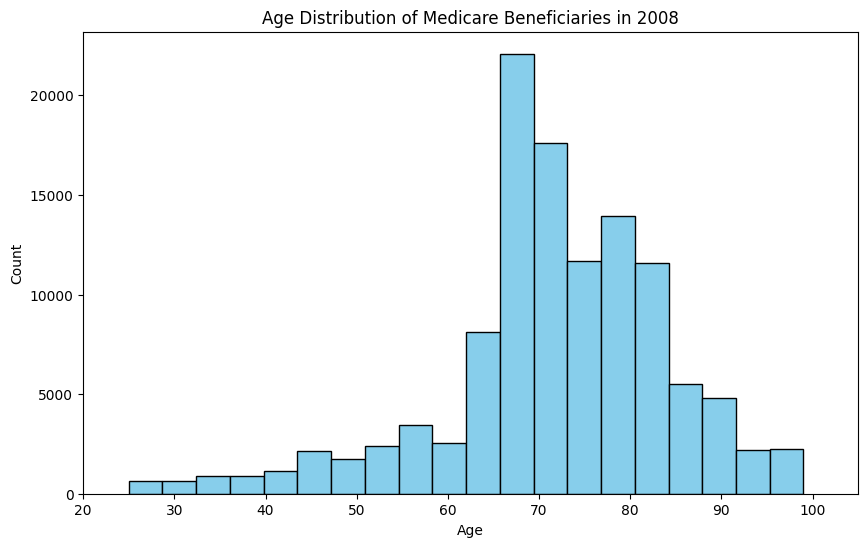

In [110]:
# examine the distribution of the age variable for 2008 using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(merged_demo[merged_demo['year'] == 2008]['age'], 
         bins=20, 
         color='skyblue', 
         edgecolor='black')
plt.title('Age Distribution of Medicare Beneficiaries in 2008')
plt.xlim(20, 105)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Next, we'll create a density plot.

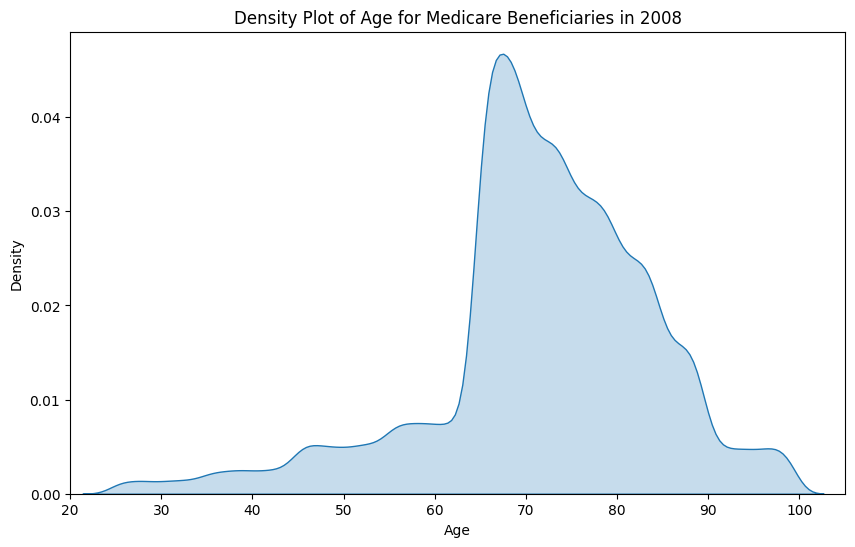

In [111]:
# create a density plot for the age distribution in 2008
plt.figure(figsize=(10, 6))
sns.kdeplot(data=merged_demo[merged_demo['year'] == 2008], x='age', fill=True)
plt.title("Density Plot of Age for Medicare Beneficiaries in 2008")
plt.xlim(20, 105)
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()